<a href="https://colab.research.google.com/github/RA2112704010029/APPLIED-DEEP-LEARNING-/blob/main/Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code tells us how to predict the next word in a text based on the given corpus of text provided to the algorithm

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Storytelling Corpus
corpus = [
    'once upon a time there was a brave knight',
    'the knight rode his horse through the dark forest',
    'he discovered a hidden cave filled with treasures',
    'inside the cave a dragon guarded the gold',
    'the knight challenged the dragon to a fierce battle',
    'after a long fight the knight emerged victorious',
    'he returned to the village as a hero',
    'the villagers celebrated his courage and bravery',
    'the knight shared his treasures with the poor',
    'he became known as the protector of the realm',
    'years later the knight trained young warriors',
    'one of his students became a great king',
    'the kingdom flourished under the new king',
    'the brave knight watched proudly from his home',
    'his legend was told for generations to come'
]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1

# Prepare sequences
sequences = []
for line in corpus:
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i + 1]
        sequences.append(sequence)

# Pad sequences
max_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Split into X and y
X, y = sequences[:, :-1], sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

# Model definition function
def build_model(model_type):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_length - 1))
    if model_type == 'RNN':
        model.add(SimpleRNN(50))
    elif model_type == 'LSTM':
        model.add(LSTM(50))
    elif model_type == 'GRU':
        model.add(GRU(50))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Training the models
models = {}
histories = {}
for model_type in ['RNN', 'LSTM', 'GRU']:
    print(f"Training {model_type} model")
    model = build_model(model_type)
    history = model.fit(X, y, epochs=300, verbose=0)
    models[model_type] = model
    histories[model_type] = history

# Predict next word
def predict_next_word(model, text):
    encoded = tokenizer.texts_to_sequences([text])[0]
    encoded = pad_sequences([encoded], maxlen=max_length - 1, padding='pre')
    prediction = model.predict(encoded, verbose=0)
    predicted_word = tokenizer.index_word[np.argmax(prediction)]
    return predicted_word

Training RNN model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training LSTM model
Training GRU model


In [ ]:
# Comparison
input_text = 'the knight rode'
correct_continuation = 'his'

print(f"Input text: '{input_text}'")
print(f"Correct next word: '{correct_continuation}'")

predictions = {}
for model_type, model in models.items():
    predicted_word = predict_next_word(model, input_text)
    predictions[model_type] = predicted_word
    print(f"{model_type} Prediction: {predicted_word}")

Input text: 'the knight rode'
Correct next word: 'his'
RNN Prediction: his
LSTM Prediction: his
GRU Prediction: his


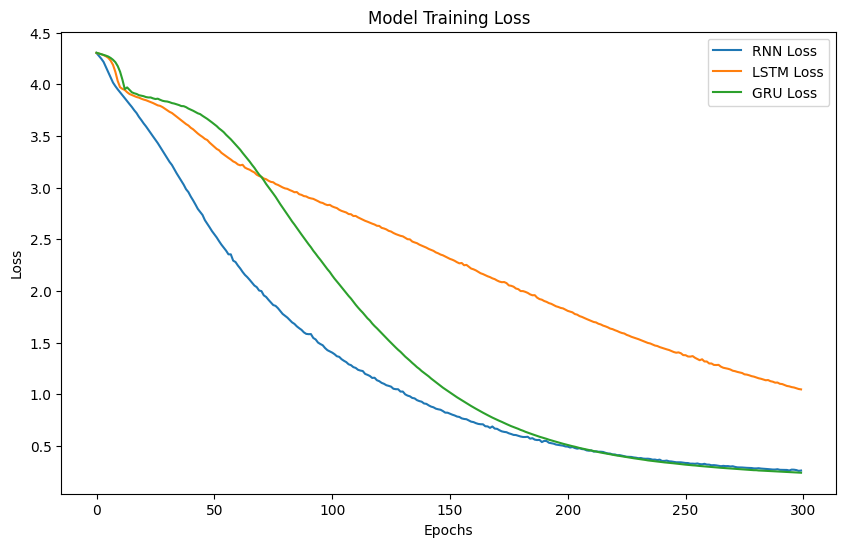

In [ ]:
# Plot training loss
plt.figure(figsize=(10, 6))
for model_type, history in histories.items():
    plt.plot(history.history['loss'], label=f'{model_type} Loss')

plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


Saving NextWordPrediction_ShreyaVemana.ipynb to NextWordPrediction_ShreyaVemana.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>